Automatically created module for IPython interactive environment
The information of the data before downsampling: 

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.18264.1517874409.541909
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '00a85be6-6eb0-421d-8acf-ff2dc0007e8a'
(0010, 0020) Patient ID                          LO: '00a85be6-6eb0-421d-8acf-ff2dc0007e8a'
(0010, 0030) Patie

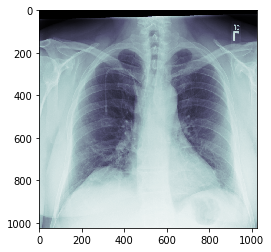

In [7]:
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_files

print(__doc__)

# FIXME: add a full-sized MR image in the testing data
#filename = get_testdata_files('C:\\Users\\saba\\ml_ws\\kaggle\\competitions\\pneumonia detection\\workspace\\stage_1_train_images\\00a85be6-6eb0-421d-8acf-ff2dc0007e8a.dcm')[0]
filename = 'C:\\Users\\saba\\ml_ws\\kaggle\\competitions\\pneumonia detection\\workspace\\stage_1_train_images\\00a85be6-6eb0-421d-8acf-ff2dc0007e8a.dcm'

ds = pydicom.dcmread(filename)

# print the image information given in the dataset
print('The information of the data before downsampling: \n')
print(ds)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

# get the pixel information into a numpy array
data = ds.pixel_array
print('The image has {} x {} voxels'.format(data.shape[0],
                                            data.shape[1]))
data_downsampling = data[::8, ::8]
print('The downsampled image has {} x {} voxels'.format(
    data_downsampling.shape[0], data_downsampling.shape[1]))

# copy the data back to the original data set
ds.PixelData = data_downsampling.tobytes()
# update the information regarding the shape of the data array
ds.Rows, ds.Columns = data_downsampling.shape

# print the image information given in the dataset
print('The information of the data set after downsampling: \n')
print(ds)
#plt.imshow(ds.pixel_array, cmap=plt.cm.bone)